# Lab 1, Assignment 2 - Transmission Lines
## EL2820 Modelling of Dynamical Systems

Group members: JAVIER LOPEZ INIESTA DIAZ DEL CAMPO & LUKAS RAPP


Group number: 5

In this home-work assignment, you will model a "Transmission line". A transmission line is a specialized cable used to transmit high-frequency electrical signals. A standard model is the following:

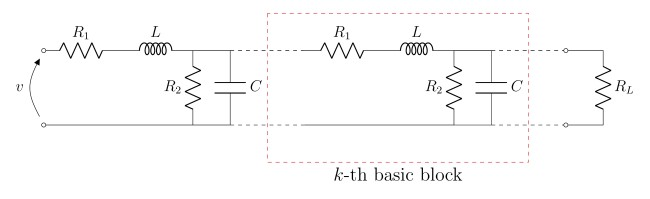

The transmission line is represented as the concatenation of $N$ (≫1) basic blocks (like the one shown in the figure), where block 1 is the one to the left, and the $N^{th}$ is the one connected to $R_L$. $R_L$ is an external resistive load connected to the line. 

**The goal of this assignment is to derive a model of this Transmission line, and to use it to complete the code and there are 7 questions which you need to answer.**

**Note:** The provided answers should be well motivated!

## Instructions

1. *Inspect the code below. You will be asked later to modify only one function* `model`.
2. *Derivation of a model of the Transmission Line, based on the parameters stated in the code below.*

### Task 1

*Which signal (voltage or current) can be considered as input to the left side of the $k^{th}$ basic block? Which signal (voltage or current) can be considered as output of this block to the next $(k+1)^{th}$ basic block? Motivate your answer.*

**Write your answer in the cell below.**  (*Hint: you can write equations in "Latex mode", for example, $\dot{x} = \dots$; to show them, execute this block to compile the text.*)

The transmission line is the concatenation of N basic blocks. If each block is connected with the next one, the output of the $k^{th}$ basic block should be the input of the next block $(k+1)^{th}$.

According to Task 2, if we compute the transfer function as the relation between the voltage at the output and the input, the signal that can be considered as input to the left side is the **voltage**. In the same way, the signal that can be considered as output of this block is the input of the next basic block, which is also the **voltage**.


### Task 2

*Compute the transfer function from the input to the output of the $k^{th}$ basic block, considered as an isolated circuit. If the transmission line consists of $N$ of such blocks, can the relation between $V$ and the current through $R_L$ be computed by concatenating these transfer functions? Explain.*

**Write your answer in the cell below.**

To compute the transfer function of the $k$-th block in Laplace domain, we consider the following figure:

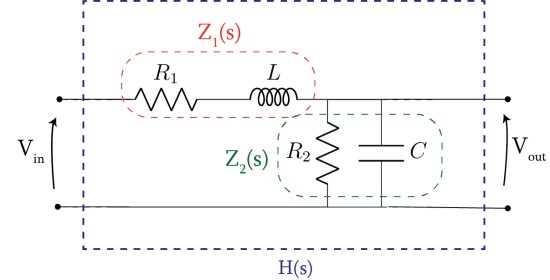
<center> <b> Figure 1: </b>  Sketch to compute the transfer function.<center>

Therefore, the equivalent impedances of the serial and the parallel part, respectively are:

$Z_1(s) = R_1 + s\cdot L$

$Z_2(s) = R_2 \left|\right|\dfrac{1}{s\cdot C} = \dfrac{R_2}{1+R_2\cdot C\cdot s} $

The output voltage is:

$V_{out} = V_{in}\cdot \dfrac{Z_2(s)}{Z_1(s) + Z_2(s)} = V_{in}\cdot \dfrac{\dfrac{R_2}{1+R_2\cdot C\cdot s}}{R_1 + s\cdot L + \dfrac{R_2}{1+R_2\cdot C\cdot s}}=V_{in}\cdot \dfrac{R_2}{(R_1 + s\cdot L)\cdot (1+R_2\cdot C \cdot s)+R_2}$

Finally, the transfer function is:

$H(s) = \dfrac{V_{out}}{V_{in}}=\dfrac{R_2}{(R_1 + s\cdot L)\cdot (1+R_2\cdot C \cdot s)+R_2}$

It's not possible to calculate the relation between $V$ and the current through $R_L$ by concatenation the transfer functions.
For the calculation of the transfer function of one block, we implicitly assume that the circuit is isolated and no current flows out of the output port. If we concatenate multiple blocks, this assumption doesn't hold anymore.
To analyze the concatenated system, we must therefore consider the individual currents and voltages in each state and derive a state space model, which is done in the following exercises.

### Task 3
 *Develop a model of the full transmission line, with $V$ as input, and from which all voltages and currents at the ports can be computed.*

We define $N$ currents and $N$ voltages $v_k$, $i_k$ with $k = 0, \dots, N - 1$ as state variables according to Fig. 2.

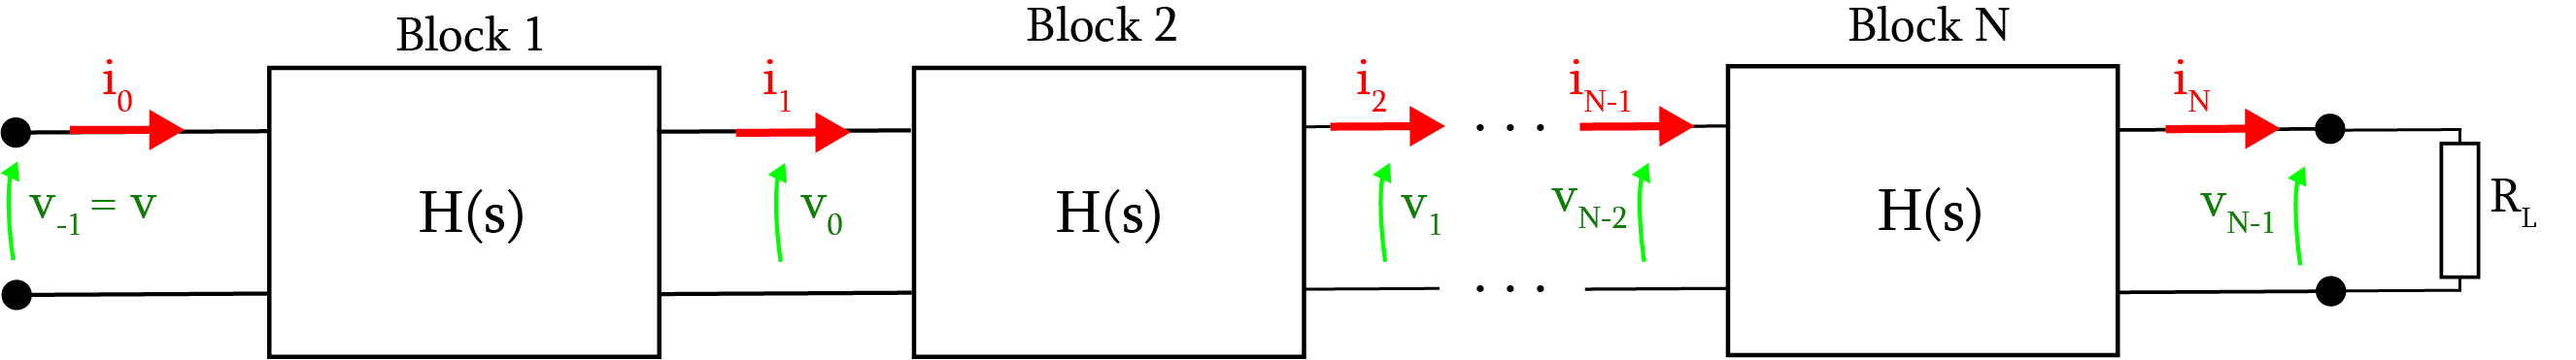
<center> <b> Figure 2: </b>  Definition of the state variables.<center>

For $ k = 0, \dots, N-1$, we consider one block to derive the state space model (s. Fig. 3)

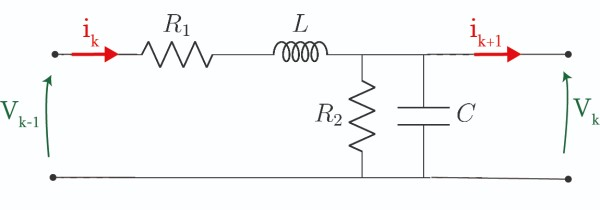
<center> <b> Figure 3: </b> Circuit diagram used to calculate the state space model.<center>

From the circuit diagram, we obtain, using the kirchhoff's laws:

$ v_{k-1} - v_{k} = R_1 i_{k} + L \dfrac{d i_{k}}{d t}$

$ i_{k} - i_{k-1} = \dfrac{v_k}{R_2} + C \dfrac{d v_k}{d t}$

for $k = 0, \dots, N -1$.

Solving these equations for the derivatives gives:

$\dfrac{d i_k}{dt} = \dfrac{1}{L} \left(v_{k-1} - v_k - R_1 i_k\right) \qquad (1)$

$\dfrac{d v_k}{dt} = \dfrac{1}{C} \left(i_k - i_{k + 1} - \dfrac{v_{k}}{R_2}\right) \qquad (2)$

The first voltage is the input and given by:

$v_{-1} = V \qquad (3)$

The last current can be directly obtained from the last voltage.

$i_{N} = \dfrac{v_{N-1}}{R_L} \qquad (4)$

Hence, it's not a state variable.

Equation (1) and (2) form the state space model of the transmission line, where $v_{k-1}$ and $i_{k+1}$ are replaced by equation (3) and (4), respectively, if $k$ is outside $0 \leq k \leq N-1$.

### Task 3 
*Implement your model in the function __model__ (by replacing the lines "# FILL IN!..."). This function uses the global variables __R1__, __R2__, __L__ and __C__ (defined in the code) as parameters, and __v__ with __i__ as state variables, and returns the derivatives of the state as a single vector, based on your answers to Point 2.*

### Task 4
*Consider now the case where the transmission line has length $M$ , so each basic block has length $M/N$ , and the components of each basic block have values*

$\displaystyle R_1 = \dfrac{R_1^o M}{N},\ R_2 = \dfrac{R_2^o N}{M},\ L = \dfrac{L^o M}{N},\ C = \dfrac{C^o M}{N}$.

*Note that the definition of $R_2$ differs from the other components. 
Simulate the model for several values of $N$, with $M = 1$ m, $R_1^o = 0.01$ $Ω$, $R_2^o = 100$ k$Ω$, $L^o = 3$ H, $C^o = 3$ F and $R_L = 1$ $Ω$, where the input voltage ramps from $0$ V to $1$ V within $0.5$ s (and stays at $1$ V afterwards), and plot the voltage for different basic blocks, as a function of k M/N (that is, the location of the block along the transmission line). Describe the results: what conclusions can you draw from the plots?*

We simulated the model for several values of $N$. For small $N = 10$, we see that the simulation is inaccurate resulting in oszillations of the signal. 
In reality, these oszillations don't occure. We would expect that the step travels along the transmission line without changing its shape (at least until reflections occure).
By increasing $N$ to $100$ or even $500$ we see that the amplitude of the oszillations decreases and the simulation becomes more accurate. For $N=500$, we see almost no oszillations and the simulation matches the expected behaviour of the line in reality.

Furthermore, we see that the ramp function travels over time along the time to the right direction. At the end of the line at $t=4 [s]$ a reflection occurs with a negative sign which travels back in left direction. This reflected wave is the reason for the voltage drop at $t = 4.2 [s]$ and $t=5.3 [s]$ at position $x = 0.67 [m]$ and $x = 0.33 [m]$, respectively. At the start the wave is reflected again and travels to the right which again results in a change of the voltage over time.
We will analyze the relation between reflection and load resistance in detail in task 7.

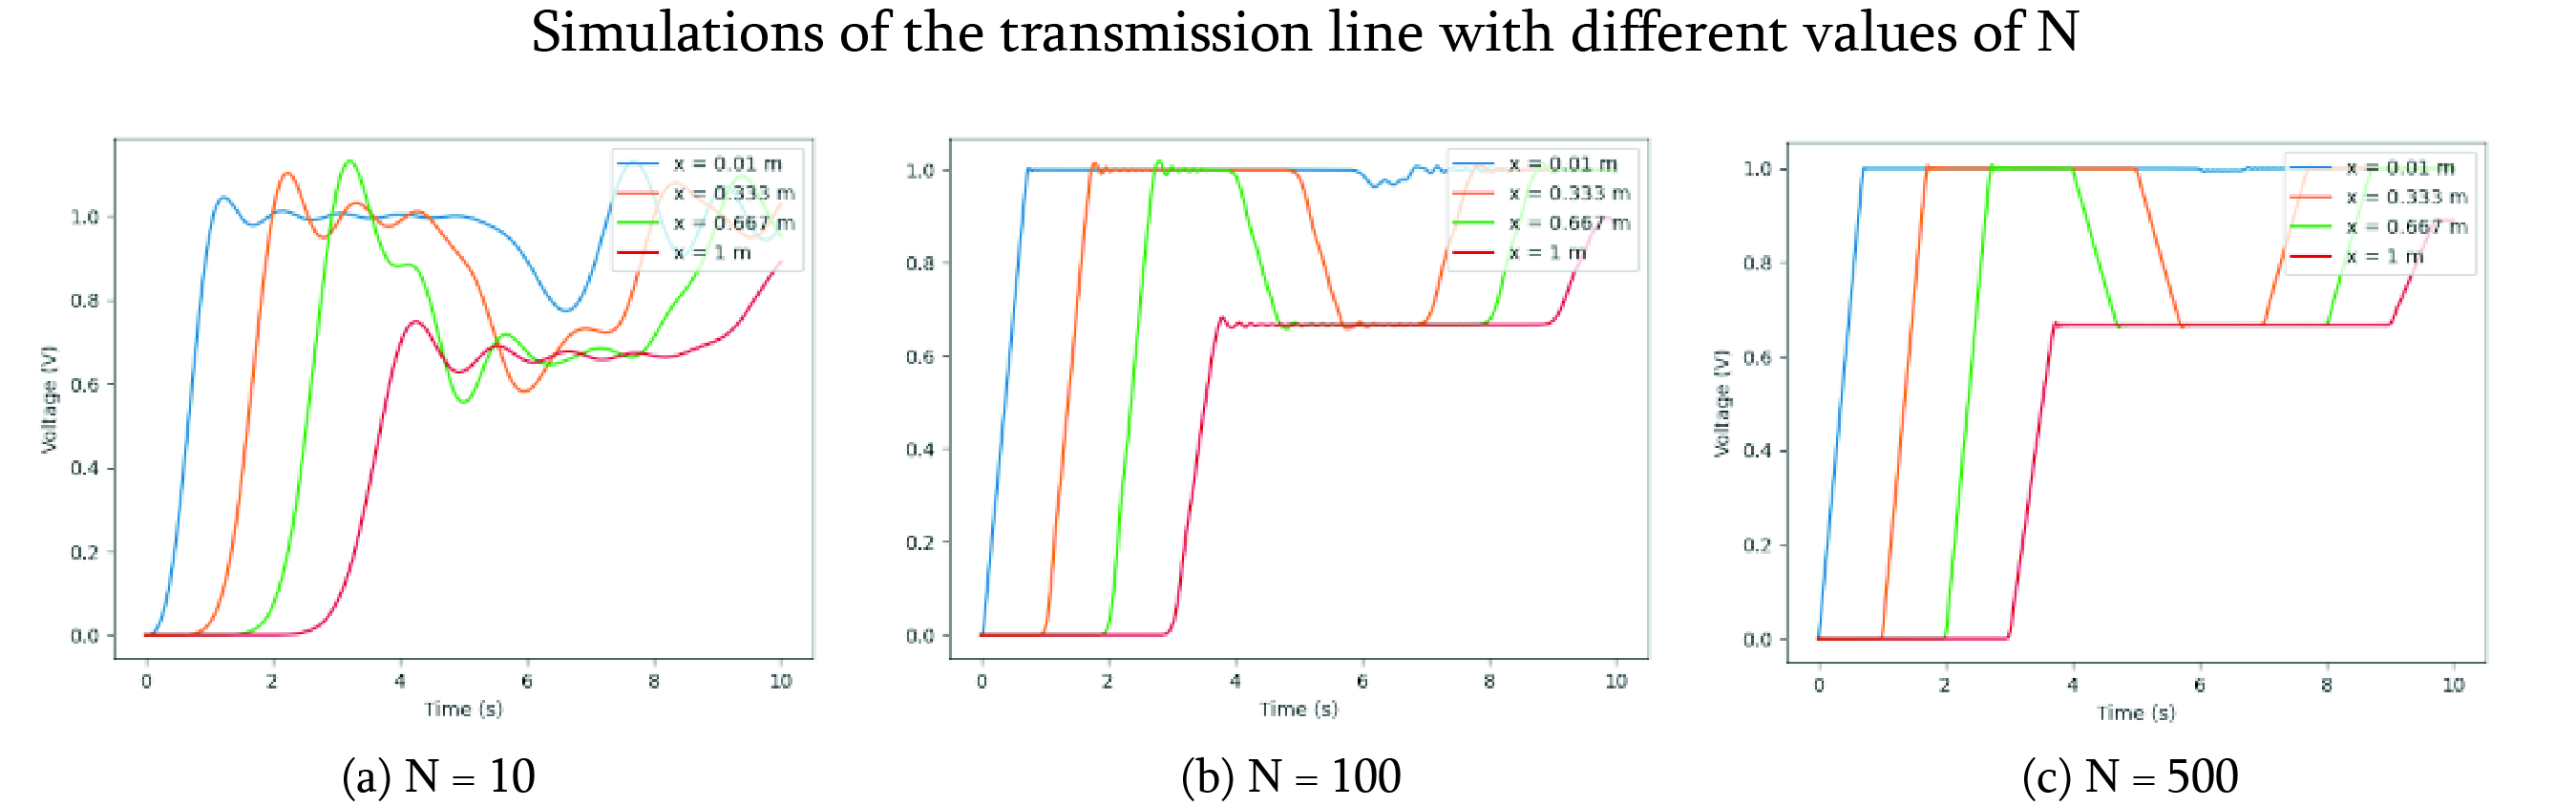
<center> <b> Figure 4: </b> Simulation results with different $N$.<center>

### Task 5
*If you let $N \to \infty$, derive a system of partial differential equations (PDE) in $v$ and $i$ describing the voltage at a distance x (=k M/N ) from the left end of the line. If $R_1^o = 0$ and $R_2^o = \infty$, obtain a single PDE in v; what type of PDE is it?*

We start with the system of differential equation which we derived in task 3:

$\dfrac{d i_k}{dt} = \dfrac{1}{L} \left(v_{k-1} - v_k - R_1 i_k\right)$,

$\dfrac{d u_k}{dt} = \dfrac{1}{C} \left(i_k - i_{k + 1} - \dfrac{u_{k-1}}{R_2}\right)$.

We define the length of one block $ \Delta x = \dfrac{M}{N}$ and replace $R_1$, $R_2$, $C$ and $L$ by the terms given above that depend on $N$:

$\dfrac{d i_k}{dt} = \dfrac{1}{L^0} \left(-\dfrac{v_{k} - v_{k-1}}{\Delta x} - \dfrac{R_1^0 M}{N} \dfrac{N}{M} i_k\right)$,

$\dfrac{d u_k}{dt} = \dfrac{1}{C^0} \left( - \dfrac{i_{k + 1} - i_k}{\Delta x} - u_{k-1} \dfrac{M}{R_2^0 N} \dfrac{N}{M}\right)$

Simplifying the equation gives:

$\dfrac{d i_k}{dt} = \dfrac{1}{L^0} \left(-\dfrac{v_{k} - v_{k-1}}{\Delta x} - R_1^0 i_k\right)$,

$\dfrac{d u_k}{dt} = \dfrac{1}{C^0} \left( - \dfrac{i_{k + 1} - i_k}{\Delta x} - \dfrac{u_{k-1}}{R_2^0}\right)$.

For $N \to \infty$, $\Delta x$ goes to $0$. Therefore, the difference quotients with $\Delta x$ as denominator become partial derivatives: $\dfrac{\partial }{\partial  x}$. Furthermore, we can replace the discrete indices $k -1$, $k$ and $k + 1$ by the actual continuous position $x = \dfrac{k M}{N}$ on the line, where we use the fact that:

$k-1 \approx k \approx k + 1$   if   $N \to \infty$ 

Hence, the position of $v_{k-1}$, $v_{k}$ and $v_{k+1}$ is the same.
With these facts, we obtain the PDE of the system:

$ \dfrac{\partial v(x, t)}{\partial t} = \dfrac{1}{C^0} \left(- \dfrac{\partial i(x, t)}{\partial x} - \dfrac{v(x, t)}{R_2^0}\right)$,

$ \dfrac{\partial i(x, t)}{\partial t} = \dfrac{1}{L^0} \left(- \dfrac{\partial v(x, t)}{\partial x} - R_1^0 v(x, t)\right)$.

If $R_1^o = 0$ and $R_2^o = \infty$, we obtain the following PDE:

$ \dfrac{\partial v(x, t)}{\partial t} = -\dfrac{1}{C^0} \dfrac{\partial i(x, t)}{\partial x}, \qquad (1)$

$ \dfrac{\partial i(x, t)}{\partial t} = -\dfrac{1}{L^0} \dfrac{\partial v(x, t)}{\partial x}.  \qquad (2)$

We apply the partial derivative with respect to $t$ to equation (1) and change the order in which the partial derivatives are applied to $i(x,t)$ (s. Schwarz's theorem):

$ \dfrac{\partial^2 v(x, t)}{\partial^2 t} = -\dfrac{1}{C^0} \dfrac{\partial}{\partial t} \dfrac{\partial i(x, t)}{\partial x} = -\dfrac{1}{C^0} \dfrac{\partial}{\partial x} \dfrac{\partial i(x, t)}{\partial t}$

Next, we insert equation (2):

$ \dfrac{\partial^2 v(x, t)}{\partial^2 t} = \underbrace{\dfrac{1}{C^0 L^0}}_{=c^2} \dfrac{\partial^2 v(x, t)}{\partial^2 x}$

The last equation is the wave equation. The propagation of voltages on the line can be completly described by solving this equation. According to the wave equation, a signal propagates on the line with the velocity [1]:

$c = \dfrac{1}{\sqrt{C^0 L^0}}$

### Task 6
*Estimate from the simulations in Question 4 the speed of propagation of the voltage along the transmission line. Relate your estimate to the PDE derived in Question 5.*

**Write your answer in the cell below.**

We have measured the time of propagation in different simulations. We obtained the following results:

* For $x = 0.01 \;[m]$: $t_{prop_1}=0,70821 \; [s] $

* For $x = 0.333 \;[m]$: $t_{prop_2}=1,70961 \; [s] $

* For $x = 0.667 \;[m]$: $t_{prop_3}=2,71377 \; [s] $

* For $x = 1 \;[m]$: $t_{prop_4}=3,71192 \; [s] $

Therefore, we can compute the speed of propagation as:

$v_{prop} = \dfrac{\Delta x}{\Delta t}$

Thus:

$v_{prop_1} \approx \dfrac{0,333 - 0,01}{1,70961 - 0,70821} = 0,3225 \; [m/s]$

$v_{prop_2} \approx \dfrac{0,667 - 0,333}{2,71377 - 1,70961} = 0,3326 \; [m/s]$

$v_{prop_3} \approx \dfrac{1 - 0,667}{3,71192 - 2,71377} = 0,3336 \; [m/s]$

Finally, the estimated speed of propagation is the mean of the different measures:

$E[v_{prop}]=0,3295 \; [m/s]$

<br>

---

Theorically, the propagation speed is:

$v_{prop_{th}} = \dfrac{1}{\sqrt{C_0 \cdot L_0}}$

Where according to the simulation, $C_0 = 3 \; [F]$ and $L_0 = 3 \; [H]$. Consequently, the theorecic propagation speed is: 

$ v_{prop_{th}} = 0,33 \; [m/s]$

<br>

---

Therefore, the estimated speed of propagation is approximately equal to the theoretic one. 

### Task 7
*Repeat the simulations of Question 4, but varying $R_L$ (in particular, try with values smaller and larger than $1$ $\Omega$). What do you observe?*

**Write your answer in the cell below.**

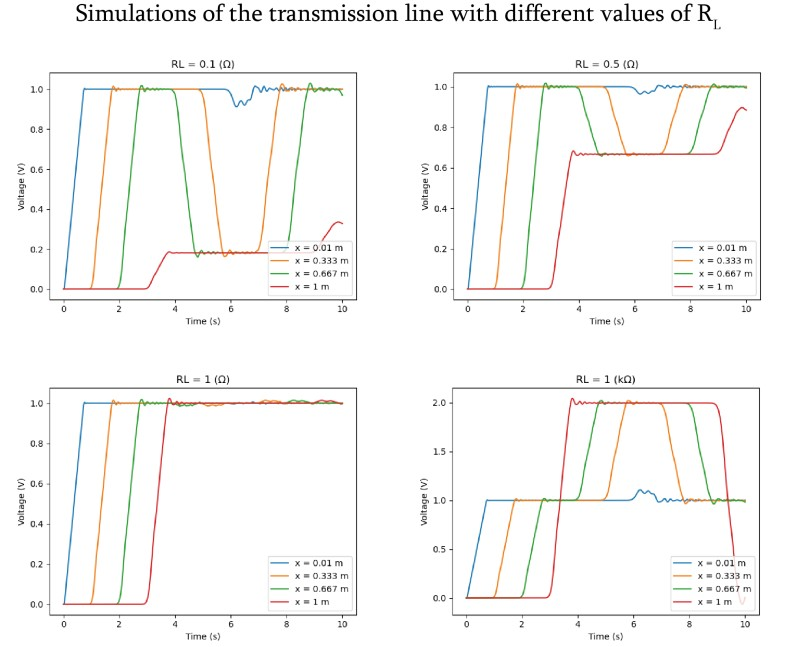
<center> <b> Figure 5: </b> Simulation results with different $R_L$.<center>

In Figure 2, we can observe that with $R_L = 1 \; [\Omega] =1 \; [\Omega]$ there are not reflections in the transmission line. This is in match with the theory of the transmission line model [1], according to which no reflections occure on the line if the load matches the characteristic impedance 
$R_L = Z_0 = \sqrt{\dfrac{L_0}{C_0}} =1 \; [\Omega]$.

Whereas, if we reduce the value of $R_L$ to  $R_L = 0.5 \; [\Omega]$ and $R_L = 0.1 \; [\Omega]$, we see a reflection of the wave of negative sign traveling to the left on the transmisision line. 
Finally, for a large value $R_L = 1 \; [k\Omega]$, there appear positive reflections.

This is also in match with the theory. According to the theory [1], the wave is reflected at the end of the transmission line with the reflection coefficient:
$ \tau = \dfrac{R_L - Z_0}{R_L + Z_0}$.
Its easy to see that the sign of the reflection is positiv for $ R_L > Z_0 $ and negative for $ R_L < Z_0 $, which explains the simulation results.

---

[1]  D. Pozar, Microwave Engineering, 4th Edition. Wiley, 2011. [Online]. Available: https://books.google.se/books?id=JegbAAAAQBAJ [Accesed: 14/09/2022]

<br>

---

## Code

The code below imports the necessary libraries for executing this notebook. If you are not able to import any of these libraries, you can install it using the command: *pip install __library_name__*  (to be executed in a command line or terminal window, not inside Python)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
%matplotlib qt

c:\Users\rappl\anaconda3\envs\EL2820\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<br>

Next, let us initialize the parameters and variables required for this system:

In [5]:
global N, RL, R1, R2, L, C

M  = 1               # Length of transmission line
dx = 0.01            # Length of each basic block
N  = int(M/dx)       # Number of basic blocks
T  = 10              # Time duration of simulation

# Parameters of the transmission line (per unit length) and load
R1o = 0.0
R2o = 1e+13
Lo  = 3.0
Co  = 3.0
RL  = 0.5

# Parameters of each basic block
R1 = R1o*dx
R2 = R2o/dx
L  = Lo*dx
C  = Co*dx

<br>

*model():* You NEED to fill this function (in particular the sections "*#FILL IN...*"). This function is intended for decribing the Ordinary Differential Equations for the Transmission line setup 

In [6]:
def model(t, curr_state):
    global N, RL, R1, R2, L, C

    v = curr_state[0:N]
    i = curr_state[N:len(curr_state)]

    # Input (Boundary condition)
    if t < 0.7:
        u = t/0.7
    else:
        u = 1
    
    # Initialize vectors der_v and der_i
    der_v = np.zeros(N)
    der_i = np.zeros(N)

    i_N = v[-1] / RL
    u_minus_1 = u

    # FILL IN YOUR CODE HERE TO DETERMINE THE DERIVATIVES OF VECTORS v AND i
    # (RECALL THAT, IN PYTHON, VECTOR INDICES START WITH 0)
    for k in range(N):
        i_k_plus_1 = i[k+1] if k + 1 != N else i_N
        u_k_minus_1 = v[k-1] if k > 0 else u_minus_1
        der_v[k] = 1/C * (i[k] - i_k_plus_1 - v[k] / R2)
    for k in range(N):
        u_k_minus_1 = v[k-1] if k > 0 else u_minus_1
        der_i[k] = 1/L * (u_k_minus_1 - v[k] - R1*i[k])

    # Concatenate der_v and der_i
    der = np.concatenate((der_v, der_i))

    return(der)

<br>

Below is the main function of this notebook which executes the above function and updates the plot

In [7]:
sol = solve_ivp(model, [0, 10], np.zeros(2*N), method='RK45', dense_output=True, rtol=1e-9, atol=1e-9)
plt.plot(sol.t, sol.y[0,:], label="x = 0.01 m")
plt.plot(sol.t, sol.y[int(N/3),:], label="x = 0.333 m")
plt.plot(sol.t, sol.y[int(2*N/3),:], label="x = 0.667 m")
plt.plot(sol.t, sol.y[N-1,:], label= "x = 1 m")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.legend(loc="upper right")
plt.show()